<a href="https://colab.research.google.com/github/isabellasims/course-work/blob/master/AI_project_evolutionary_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the second homework assignment, when I found that swapping a gene (higher mutation rate) produced better offspring in some situations, it reminded me of the Monty Hall problem. Here, I attempted to impliment the monty hall problem in order to quickly generate a fit population. The program takes a population of contestants, then checks each individual to see if it is applicable to perform the montyhall problem on. If it is, the monty hall problem is performed on that individual. The other individuals who do not satisfy the population (goat doors aka when there is not one and only one correct letter in the three letter string) is added to the end of the population. I think that implimenting the Monty Hall problem would be better suited to other projects like neural networks or gameshow simulation. I also think that adjusting the fitness algorithm to better fit the monty hall problem would produce more meaningful results.

In [ ]:
from random import choice, random, randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
charset = list("abcdefghijklmnopqrstuvwxyz")
goal = input("define a 3 letter gene you wish to generate : ")
goal = list(goal)

#goal = ["f","i","t"]
stringLength = len(goal)
million = goal[0]

define a 3 letter gene you wish to generate : fit


In [ ]:
def MHcondition(individual):
    counter = 0    
    if million in individual:
      counter += 1          
    if counter == 1:
      return True
    else:
      return False    
    counter = 0

In [ ]:
def fitness(individual):
  f = 0
  
  # if MHcondition(individual) == True: 
  #   f +=1 # add 1 to fitness for combinations with correct condition for MH problem 
  if getSwitch(individual) == million:
    f+=2 # add 2 to fitness when MH problem works
  for i in range(len(individual)):
    if individual[i] == goal[i]:
      f += 1
    if individual[i] in goal:
      f += 1     
 
  return f

In [ ]:
def isGoal(individual):  
  if individual == goal:
    return True

In [ ]:
def getSwitch(individual): 
  temp = individual
  pick = choice(temp)
  temp.remove(pick) # remove the random choice 
  for char in temp:
    if char!= million:
      goat = char
      temp.remove(goat)
    else: # this is accounting for an error I'm not sure why I have when a value is not assigned to goat despite the individual satisfying MH problem condition... Not super important because we don't care much about the goat value
      goat = choice(charset) 
  switch = temp
    
  return switch

In [ ]:
print(getSwitch(["f","o","h"]))
print(getSwitch(["p","o","h"]))

['f']
['o']


In [ ]:
populationSize = 50
stringLength = 3
population = []
def makeContests():
  contestants = [[choice(charset) for _ in range(stringLength)] for _ in range(populationSize)]
  #print("contestants" ,contestants)
  return contestants

In [ ]:
doors = []
goatDoors = []
def mhProblem(contestants):
    goat = ''
    pick = ''
    temp = ''   
    evolvedTemp = []  

    for i in contestants:       
      if MHcondition(i): 
        for j in i:
          evolvedTemp.append(j)         
        temp = i              
        switch = getSwitch(temp) 
        switch = np.array(switch,ndmin = 1) # fixes switch issue     
        #print("switch" , switch[0])
        evolvedTemp.remove(switch[0])
        evolvedTemp.insert(0, switch[0])
        doors.append(evolvedTemp)
        evolvedTemp = []
      else: 
        goatDoors.append(i) 
    return doors

In [ ]:
mutationRate = .1
def mutate(example):
  if MHcondition(example) == True:
    switch = getSwitch(example) 
    if len(switch) == 0: # Filtering out empty switch values
      genebank = [goal[0],choice(charset),choice(charset)] 
      return genebank
    switch = switch[0]
    genebank = [switch,choice(charset),choice(charset)] # idea is you put the switched value in here and try again for the rest try for another goal value bc MH condition should make you 2/3 sure that the switch is there]  
    return genebank
  else: # if the condition is not true here, force satisfy MH condition at first index if mutation 
    genebank = [goal[0],choice(charset),choice(charset)] 
    return genebank
def crossover(parent1, parent2): 
  combine = parent1 + parent2
  shuffle(combine)
  return combine[:3]

In [ ]:
print(mutate(['a','b','c']))
print(mutate(['f','b','c']))
print(crossover(mutate(['a','b','c']),mutate(['f','b','c'])))
#print(mutate(crossover(['a','b','c']),mutate(['f','b','c'])))

['f', 'b', 'j']
['f', 'y', 'g']
['f', 't', 'f']


In [ ]:
stringLength = 3
x = []
y = []
cords = []




def geneticAlgorithm():
    iterations = 0   
    #while True:  
    populationSize = 50
    contestants = makeContests()
    print(contestants)
    Doors = mhProblem(contestants)
    population = Doors
    population.extend(goatDoors)
    print("population:",population)

    while True:
      iterations += 1
      #mhProblem(contestants)
      for individual in population:
        if (isGoal(individual)):
          print(f"Found gene in {iterations} iterations at index {population.index(individual)}")
          cords.append(x)
          cords.append(y)
          return individual


      population.sort(key=fitness, reverse=True)
      
      parents = population[:10] # ---> top 10 candidates  
      fittest = population[:1]
      fittest = fittest[0] # unnesting list in order to plot and guage fitness
   
   
      x.append(iterations) 
      y.append(fitness(fittest))  
      population = [mutate(crossover(choice(parents),choice(parents))) for _ in range(populationSize)] # G
      for i in population: # final filter on population
        if len(i) != 3:
          population.pop(i)
      print("population sorted:",population)

In [ ]:
geneticAlgorithm()

[['k', 's', 'x'], ['c', 'e', 'h'], ['x', 'j', 'w'], ['n', 'r', 'm'], ['o', 'm', 'z'], ['q', 'h', 'q'], ['d', 'u', 'a'], ['e', 'k', 'm'], ['y', 'f', 'z'], ['j', 'f', 'r'], ['v', 'y', 'r'], ['r', 'i', 'q'], ['l', 'o', 'i'], ['a', 's', 'c'], ['w', 'x', 'x'], ['r', 'r', 'l'], ['i', 'b', 'p'], ['q', 'z', 'v'], ['t', 'u', 'p'], ['m', 'd', 'o'], ['y', 'i', 'j'], ['g', 'v', 'w'], ['y', 'g', 'o'], ['u', 'u', 'p'], ['s', 'd', 'k'], ['g', 'j', 'i'], ['f', 'a', 'h'], ['n', 'r', 'c'], ['a', 'a', 'g'], ['u', 'v', 'd'], ['z', 'y', 'b'], ['w', 'm', 'q'], ['i', 'n', 's'], ['c', 'r', 'y'], ['s', 'w', 'z'], ['y', 'r', 'r'], ['a', 'l', 'd'], ['y', 'e', 'k'], ['f', 'b', 'a'], ['i', 'p', 'z'], ['a', 'y', 'z'], ['f', 'j', 'a'], ['f', 'f', 's'], ['d', 'm', 'z'], ['l', 'l', 'k'], ['r', 'b', 'x'], ['q', 'k', 'd'], ['y', 'q', 'f'], ['o', 'w', 'z'], ['p', 'x', 'f']]
population: [['f', 'y', 'z'], ['f', 'j', 'r'], ['f', 'a', 'h'], ['f', 'b', 'a'], ['a', 'f', 'j'], ['f', 'f', 's'], ['f', 'y', 'q'], ['x', 'p', 'f'], 

['f', 'i', 't']

iterations [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
most fit parent [0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2]


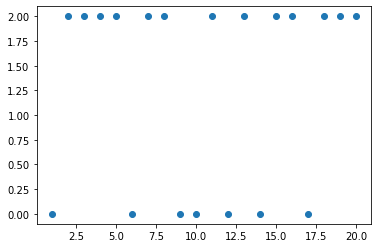

In [ ]:
x = cords[0]
y = cords[1]
print("iterations" , x)  
print("most fit parent" , y)
plt.plot(x,y,"o")
plt.show()